# Sales Analysis


#### Import necessary libraries

In [84]:
import pandas as pd
import os

#### Merging 12 months sales data into one csv file

In [85]:
path = "./sales_data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for x in files:
    current_data = pd.read_csv(path+"/"+x)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("all_data_copy.csv", index=False)

#### Read in updated dataframe

In [86]:
all_data = pd.read_csv("all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Examine the dataframe in detail

In [87]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### Data Cleaning

In [88]:
# Finding null values
print(all_data.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


In [89]:
# Missing values percentage
# percent_missing = all_data.isnull().sum() * 100 / len(all_data)
percent_missing = ((all_data.isnull() | all_data.isna()).sum() * 100 / all_data.index.size).round(2)
print(percent_missing)

Order ID            0.29
Product             0.29
Quantity Ordered    0.29
Price Each          0.29
Order Date          0.29
Purchase Address    0.29
dtype: float64


#### Drop rows of NaN

In [90]:
# Find NaN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
# Drop NaN
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [93]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [94]:
# Get rid of text in Order Date column
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [95]:
print(all_data['Order Date'].dtypes)

object


#### Change the columns correct type

In [96]:
# Use the copy method to create a new DataFrame.
df_copy = all_data.copy()

In [97]:
# There is showing a SettingWithCopyWarning while converting. That's why above copy method use for copy the new datafame
df_copy['Quantity Ordered'] = pd.to_numeric(df_copy['Quantity Ordered'], errors='coerce')
df_copy['Price Each'] = pd.to_numeric(df_copy['Price Each'], errors='coerce')

In [98]:
df_copy.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#### Augment data with additional columns

##### Add month column

In [99]:
df_copy['Month'] = df_copy['Order Date'].str[0:2]
df_copy['Month'] = df_copy['Month'].astype('int32')
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [101]:
df_copy.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [102]:
df_copy["Month"].value_counts()

Month
12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: count, dtype: int64

#### Add city column

In [117]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

df_copy['City'] = df_copy['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Add Sales column

In [118]:
df_copy['Sales'] = df_copy['Quantity Ordered'].astype('int') * df_copy['Price Each'].astype('float')
df_copy.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


## Exploratory Data Analysis (EDA)

#### Question 1: What was the best month for sales? How much was earned that month?

In [126]:
# Slice some columns
df_slice = df_copy[['Quantity Ordered', 'Price Each', 'Sales', 'Month']]
df_slice.head()

,Quantity Ordered,Price Each,Sales,Month
0,2,11.95,23.90,4
2,1,99.99,99.99,4
3,1,600.00,600.00,4
4,1,11.99,11.99,4
5,1,11.99,11.99,4


In [128]:
df_slice.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


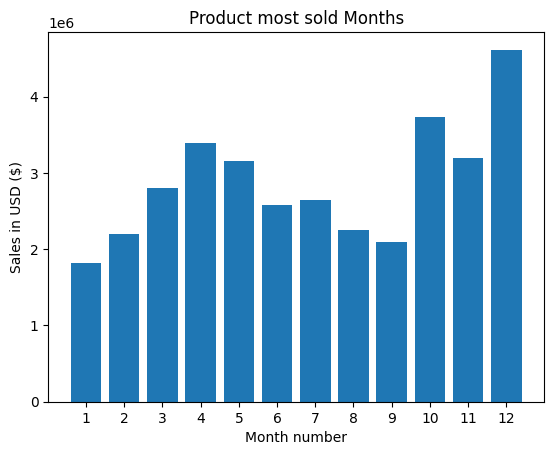

In [157]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, df_slice.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.title("Product most sold Months")
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city sold the most product?

In [134]:
df_city = df_copy[['City', 'Quantity Ordered', 'Price Each', 'Month', 'Sales']]
df_city.head()

,City,Quantity Ordered,Price Each,Month,Sales
0,Dallas (TX),2,11.95,4,23.90
2,Boston (MA),1,99.99,4,99.99
3,Los Angeles (CA),1,600.00,4,600.00
4,Los Angeles (CA),1,11.99,4,11.99
5,Los Angeles (CA),1,11.99,4,11.99


In [155]:
df_city.groupby(['City']).sum()['Sales'].sort_values(ascending=False)

City
San Francisco  (CA)    8262203.91
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Boston  (MA)           3661642.01
Atlanta  (GA)          2795498.58
Dallas  (TX)           2767975.40
Seattle  (WA)          2747755.48
Portland  (OR)         1870732.34
Austin  (TX)           1819581.75
Portland  (ME)          449758.27
Name: Sales, dtype: float64

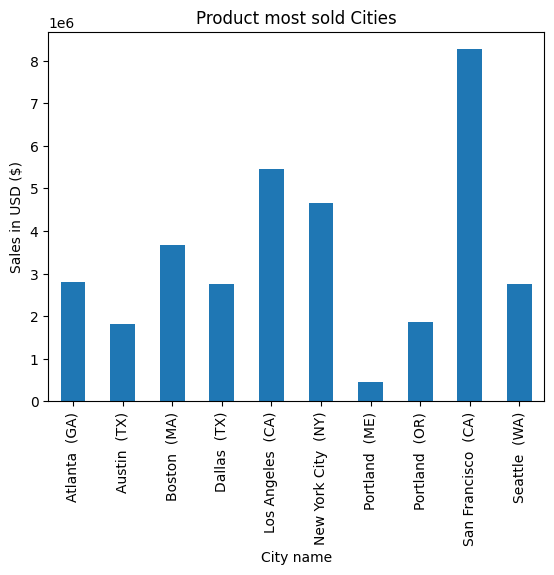

In [158]:
df_city.groupby(['City']).sum()['Sales'].plot.bar()
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.title("Product most sold Cities")
plt.show()